## Introduction

In this notebook I load and preprocess a dataset, containing house sale observations for King County, and Seattle  to train and test a multivariate log linear regregession to predict house prices. The king County dataset,was collected between May 2014 and May 2015 and Contains 21613 rows × 21 columns


## Table of Content 
    
   
   1. [Variables Overview](#cell1)
   2. [Importaing relevant libraries](#cell2)
   3. [importing dataset](#cell4)
   4. [preprocessing dataset](#cell5)
       - Dealing with missing values
       - Check for duplicate values
       - Exploring The descriptive statistics of the variables
       - Exploring PDF(Probility Distribution Functions)
       - Checking Of Least Squared (OLS) Assumptions
       - Relaxing OLS assumptions(log Transformation)
       - Relaxing assumptions
       - checking for multicolinarity
   5. [Linear Regression Model](#cell6)
        - Declaring depedent and indepedent Variable
        - Scaling data
        - Train_Test_Split data
        - fitting model
   6. [Checking Results of Linear Regression model](#cell7)
        - Scatter Plot (y_trained vs Predicted X_train)
        - residual PDf
        - R^2 score
        - features and weights
   7. [Testing](#cell8)
         - Scatter Plot(y_test vs Predicted X_test)
         - Actual Value,Predicted Value and Differences chart
    
    
   


## Variables Overview <a id="cell1"></a>

**id** - Unique ID for each home sold

**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the apartments interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not

**view** - An index from 0 to 4 of how good the view of the property was

**condition** - An index from 1 to 5 on the condition of the apartment,

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

**sqft_above** - The square footage of the interior housing space that is above ground level

**sqft_basement** - The square footage of the interior housing space that is below ground level

**yr_built** - The year the house was initially built

**yr_renovated** - The year of the house’s last renovation

**zipcode** - What zipcode area the house is in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



## Importing Relevant libraries<a id="cell2"></a>
I import pandas for data manipulation and analysis, matplotlib to visualize data in charts and graphs and seaborn for optimal visualization. I also changed the panda's display format so it will not show scientific notation when visualizing data.


In [1]:
import numpy as np
import pandas as pd
#set the pandas display format so it will not use scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



## Importing Dataset<a id="cell4"></a>
I use the panadas method to read the csv and load it into the raw_data and visualize the first five rows and columns of the dataset; noticing 'date' had extra characters, I strip the extra letters.

In [58]:
raw_data = pd.read_csv('kc_house_data.csv')
raw_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '../input/housesalesprediction/kc_house_data.csv'

In [3]:
raw_data['date'] = raw_data['date'].str.replace('T000000', '')
raw_data['date'] = raw_data['date'].astype(float)


In [4]:
raw_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013.000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209.000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225.000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209.000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218.000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521.000,360000.000,3,2.500,1530,1131,3.000,0,0,...,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223.000,400000.000,4,2.500,2310,5813,2.000,0,0,...,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623.000,402101.000,2,0.750,1020,1350,2.000,0,0,...,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116.000,400000.000,3,2.500,1600,2388,2.000,0,0,...,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


## Preprocessing<a id="cell5"></a>
With the dataset successfully loaded, I move on to Preprocessing the dataset. 

### Dealing with missing values
isnull().sum() is used on the dataset to find all the null values and return it.

In [5]:
raw_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Check for duplicate values 
To check for duplicated values, i use the .duplicated function ad .sum to return the value of duplicated values

In [6]:
raw_data.duplicated().sum()

0

In [7]:
#Since the dataset contained no missing values or duplicated values, i change the dataset to data with no missing values.
data_no_mv = raw_data

### Exploring The Descriptive statistics of the variables 
Using the pandas .describe() function to pull the statistacial values of the features in the dataset. A couple of things to take note of when obsererving the chart is huge differnces in Max, mean and the percentales. First thing I notice in respect to the statistical data is the Max of price amounting to 7700000.00 while under 75% price payed is 450000.000 with a mean of 540088.142.

In [8]:
data_no_mv.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,...,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,20143902.668,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,...,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,4436.582,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,...,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,20140502.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,...,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,20140722.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,20141016.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,20150217.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,20150527.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,...,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


### Exploring PDF(Probility Distribution Functions) Of features
I take the data with no missing values and plot the PDF for variables with weird-looking descriptive values for further observation. I am looking for outliers in the features and good distribution. Outliers are observations that lay away from the vast majority of observations and can throw off the model's predictive ability. A great way to remove outliers is to eliminate a percentile or filter the data.
        
        

C:\Users\Hugo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

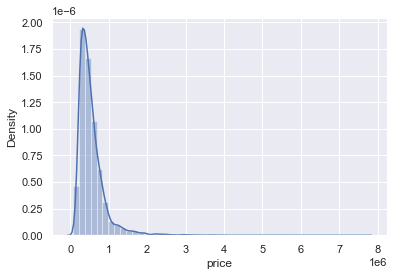

In [9]:
sns.distplot(data_no_mv['price'])

In [10]:
#using the .quantile method I the 1% of data from "price" variable to handle outliers and achieve a normal distrubtion for optimal regression results
z = data_no_mv['price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['price']<z]


C:\Users\Hugo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

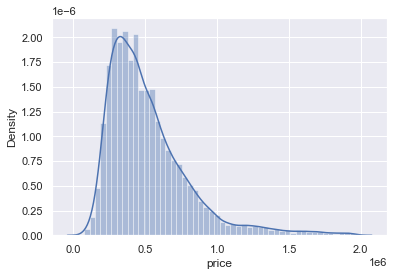

In [11]:
sns.distplot(data_1['price'])

In the distribution, i noticed outliers that range from up to 35. I isolate the bedrooms feature to visualize the column.
After a search of king county and Seattle houses in Zillow, i find they do not pass 20, so i remove all entries with more than 16 since after 16, it seemed not many places were available 

C:\Users\Hugo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

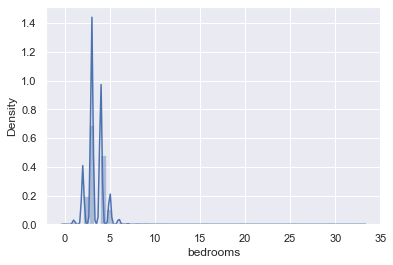

In [12]:
sns.distplot(data_1['bedrooms'])

In [13]:
bedrms = pd.DataFrame(raw_data['bedrooms'])
bedrms = bedrms.dropna(axis=0)

In [14]:
bedrms.sort_values(by='bedrooms')

,bedrooms
9773,0
6994,0
9854,0
19452,0
14423,0
...,...
15161,10
13314,10
19254,10
8757,11


In [15]:
data_2 = data_1[data_1['bedrooms']<8]

C:\Users\Hugo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

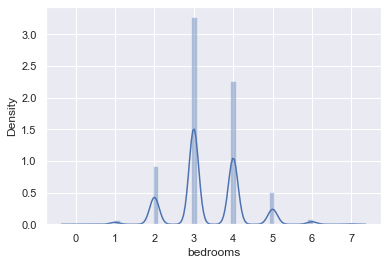

In [16]:
sns.distplot(data_2['bedrooms'])

C:\Users\Hugo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

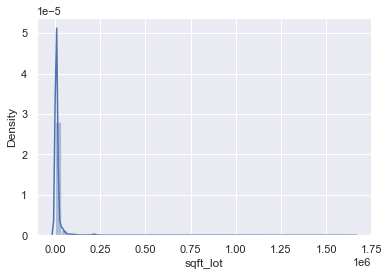

In [17]:
sns.distplot(data_2['sqft_lot'])

using the .quantile method I use 95% of observations from "sqft_lot" variable to handle outliers and achieve a normal distribution for optimal regression results

In [18]:
z = data_2['sqft_lot'].quantile(0.95)
data_3 = data_2[data_2['sqft_lot']<z]

C:\Users\Hugo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

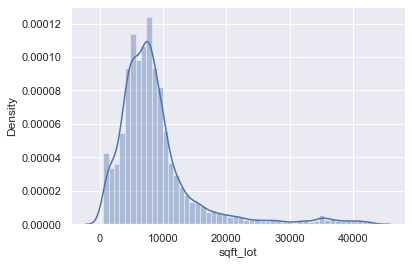

In [19]:
sns.distplot(data_3['sqft_lot'])

C:\Users\Hugo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

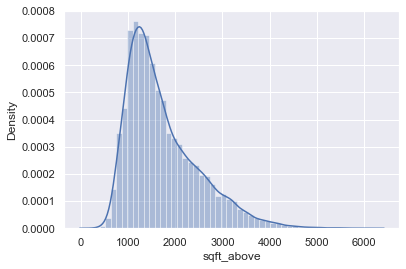

In [20]:
sns.distplot(data_3['sqft_above'])

using the .quantile method I use 99% of observations from "sqft_above" variable to handle outliers and achieve a normal distribution for optimal regression results

In [21]:
z = data_3['sqft_above'].quantile(0.99)
data_4 = data_3[data_3['sqft_above']<z]

C:\Users\Hugo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

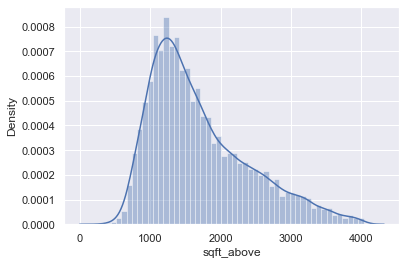

In [22]:
sns.distplot(data_4['sqft_above'])

### Index reset 
I reset the index of the data and drop it into data_cleaned variable 

In [23]:
data_cleaned = data_3.reset_index(drop=True)

In [24]:
data_cleaned.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,20306.000,20306.000,20306.000,20306.000,20306.000,20306.000,20306.000,20306.000,20306.000,20306.000,...,20306.000,20306.000,20306.000,20306.000,20306.000,20306.000,20306.000,20306.000,20306.000,20306.000
mean,4690724642.162,20143907.792,511764.345,3.351,2.081,2013.987,8738.573,1.488,0.005,0.210,...,7.597,1730.820,283.167,1970.550,81.493,98079.653,47.561,-122.222,1945.696,8618.671
std,2870561642.696,4438.262,281837.064,0.887,0.737,828.557,6641.303,0.542,0.070,0.718,...,1.109,756.575,425.134,29.581,395.029,53.983,0.137,0.136,654.284,8217.553
min,1000102.000,20140502.000,78000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,...,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.512,399.000,651.000
25%,2222939824.500,20140722.000,315462.500,3.000,1.500,1400.000,5000.000,1.000,0.000,0.000,...,7.000,1180.000,0.000,1951.000,0.000,98033.000,47.476,-122.332,1470.000,5000.000
50%,4037900090.000,20141016.000,442000.000,3.000,2.250,1870.000,7377.000,1.000,0.000,0.000,...,7.000,1530.000,0.000,1973.000,0.000,98072.000,47.572,-122.246,1810.000,7455.000
75%,7437100965.000,20150217.000,625000.000,4.000,2.500,2480.000,9910.750,2.000,0.000,0.000,...,8.000,2130.000,550.000,1997.000,0.000,98118.000,47.679,-122.140,2300.000,9620.000
max,9900000190.000,20150527.000,1960000.000,7.000,6.750,7620.000,43170.000,3.500,1.000,4.000,...,13.000,6110.000,3260.000,2015.000,2015.000,98199.000,47.778,-121.315,5790.000,335289.000


### Checking Of Least Squared (OLS) Assumptions
I use a scatter plot to plot possible predictors against "price" to check for linearity using the of least squared assumptions 

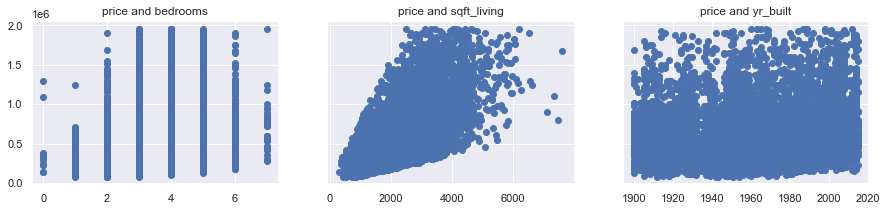

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['bedrooms'],data_cleaned['price'])
ax1.set_title('price and bedrooms')

ax2.scatter(data_cleaned['sqft_living'],data_cleaned['price'])
ax2.set_title('price and sqft_living')

ax3.scatter(data_cleaned['yr_built'],data_cleaned['price'])
ax3.set_title('price and yr_built')


plt.show()

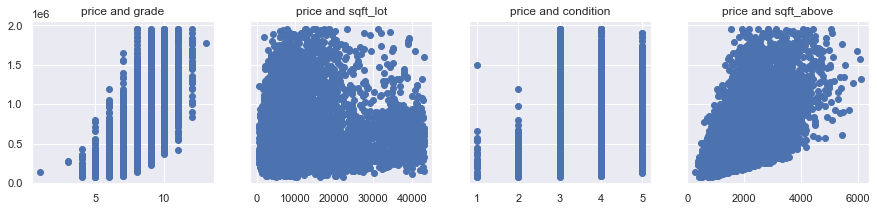

In [26]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['grade'],data_cleaned['price'])
ax1.set_title('price and grade')

ax2.scatter(data_cleaned['sqft_lot'],data_cleaned['price'])
ax2.set_title('price and sqft_lot')

ax3.scatter(data_cleaned['condition'],data_cleaned['price'])
ax3.set_title('price and condition')


ax4.scatter(data_cleaned['sqft_above'],data_cleaned['price'])
ax4.set_title('price and sqft_above')

plt.show()

### Relaxing  assumptions
Usng .np.log to transfrom 'price' to 'Log_price' to create better linearty against other variables and drop price. Log returns the natural logarithm of a number and relaxs assumptions fro better model fit.

In [27]:
log_price = np.log(data_cleaned['price'])
data_cleaned['Log_price'] = log_price


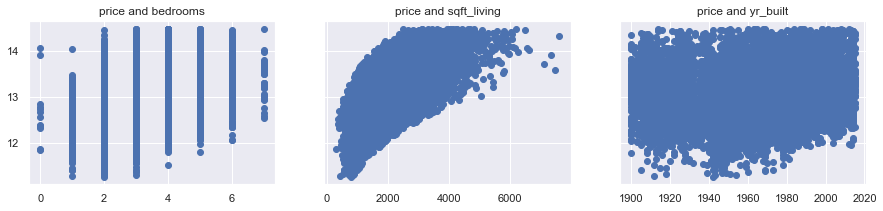

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['bedrooms'],data_cleaned['Log_price'])
ax1.set_title('price and bedrooms')

ax2.scatter(data_cleaned['sqft_living'],data_cleaned['Log_price'])
ax2.set_title('price and sqft_living')

ax3.scatter(data_cleaned['yr_built'],data_cleaned['Log_price'])
ax3.set_title('price and yr_built')


plt.show()

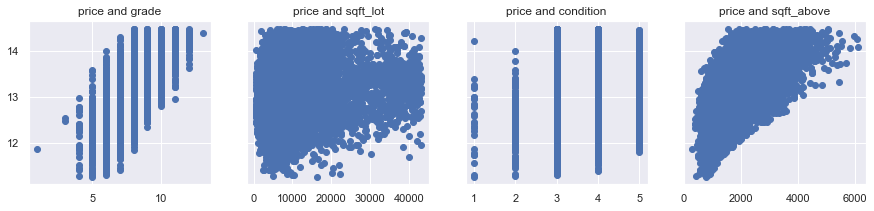

In [29]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['grade'],data_cleaned['Log_price'])
ax1.set_title('price and grade')

ax2.scatter(data_cleaned['sqft_lot'],data_cleaned['Log_price'])
ax2.set_title('price and sqft_lot')

ax3.scatter(data_cleaned['condition'],data_cleaned['Log_price'])
ax3.set_title('price and condition')


ax4.scatter(data_cleaned['sqft_above'],data_cleaned['Log_price'])
ax4.set_title('price and sqft_above')

plt.show()

In [30]:
data_cleaned = data_cleaned.drop(['price'], axis=1)
data_cleaned

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Log_price
0,7129300520,20141013.000,3,1.000,1180,5650,1.000,0,0,3,...,1180,0,1955,0,98178,47.511,-122.257,1340,5650,12.310
1,6414100192,20141209.000,3,2.250,2570,7242,2.000,0,0,3,...,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,13.196
2,5631500400,20150225.000,2,1.000,770,10000,1.000,0,0,3,...,770,0,1933,0,98028,47.738,-122.233,2720,8062,12.101
3,2487200875,20141209.000,4,3.000,1960,5000,1.000,0,0,5,...,1050,910,1965,0,98136,47.521,-122.393,1360,5000,13.311
4,1954400510,20150218.000,3,2.000,1680,8080,1.000,0,0,3,...,1680,0,1987,0,98074,47.617,-122.045,1800,7503,13.142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20301,263000018,20140521.000,3,2.500,1530,1131,3.000,0,0,3,...,1530,0,2009,0,98103,47.699,-122.346,1530,1509,12.794
20302,6600060120,20150223.000,4,2.500,2310,5813,2.000,0,0,3,...,2310,0,2014,0,98146,47.511,-122.362,1830,7200,12.899
20303,1523300141,20140623.000,2,0.750,1020,1350,2.000,0,0,3,...,1020,0,2009,0,98144,47.594,-122.299,1020,2007,12.904
20304,291310100,20150116.000,3,2.500,1600,2388,2.000,0,0,3,...,1600,0,2004,0,98027,47.535,-122.069,1410,1287,12.899


### Checking for multicolinarity
To check the Multicolinarity assumption i import Variance_ inflation from stats model, None of the features break this assumption

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

C:\Users\Hugo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [32]:
vif

,VIF,features
0,3.736,id
1,0.182,date
2,1.747,bedrooms
3,3.247,bathrooms
4,inf,sqft_living
5,2.476,sqft_lot
6,2.232,floors
7,1.180,waterfront
8,1.398,view
9,1.270,condition


In [33]:
#Converting data_cleaned variable to data_pre_process since the preprocessing was done
data_pre_proc = data_cleaned

## Linear Regression Model<a id="cell6"></a>

### Declaring depedent and indepedent Variable
Declaring independent and dependent variables, for independent(x) log_price was dropped since it's the dependent variable.

In [34]:
inputs = data_pre_proc.drop(['Log_price'],axis=1)

In [35]:
targets = data_pre_proc['Log_price']

### Scaling data
Importing and using the standard scaler function from sklearn to scale the indepedent variables , so that all the features hold a standard weight towards the depedent variable.

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [37]:
x_scaled = scaler.transform(inputs)

In [38]:
x_scaled

array([[ 0.84953268, -0.65225161, -0.39561689, ..., -0.26055644,
        -0.92576104, -0.3612686 ],
       [ 0.60037658, -0.6080891 , -0.39561689, ..., -0.71759595,
        -0.39081191, -0.11921979],
       [ 0.32774037,  1.42338673, -1.52342773, ..., -0.08363791,
         1.18346696, -0.06774335],
       ...,
       [-1.10344347, -0.74012601, -1.52342773, ..., -0.57016385,
        -1.41485739, -0.80459882],
       [-1.53263487,  1.39882697, -0.39561689, ...,  1.12530532,
        -0.81877122, -0.89221829],
       [-1.10344346, -0.65180098, -1.52342773, ..., -0.57016385,
        -1.41485739, -0.88369973]])

 ### Train_Test_Split data 
Setting a 80/20 split, splitting the training data into 80 and the test data to 20 with a random state of 9

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,targets,test_size= 0.20,random_state=9)

### Fitting model
Fitting the Linear regression module with training data and checking results by creating a scatter plot and plotting the predicted values against the observed values. I also create a Residual PDF using the difference between targets and predictions to visualize the error estimate.

In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
reg.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

## Checking Results<a id="cell7"></a>

### Scatter plot 

Plotting predicted values against the observed values to check the results

In [42]:
y_hat = reg.predict(x_train)
y_hat

array([13.35613868, 12.53581009, 12.85064044, ..., 12.76163048,
       12.89829023, 12.91502642])

Text(0.5, 1.0, 'Actual vs Predicted')

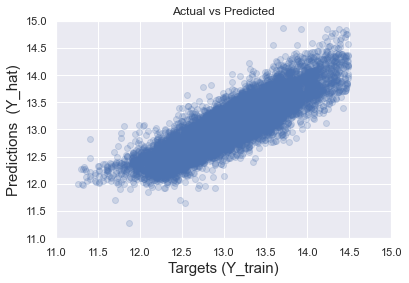

In [43]:
plt.scatter(y_train ,y_hat, alpha=0.2)
plt.xlabel('Targets (Y_train)', size=15)
plt.ylabel('Predictions  (Y_hat)', size=15)
plt.xlim(11,15)
plt.ylim(11,15)
plt.title('Actual vs Predicted')


### Residual PDf

C:\Users\Hugo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

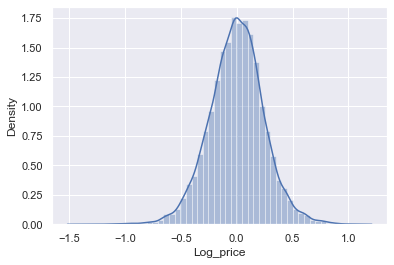

In [44]:
## Residual shows difference and mean between the targets and predictions 
sns.distplot(y_train - y_hat)
plt.show

### R^2 score
The R2 score being 76% signifies response variable variation that the linear Regression Model explains

In [45]:
reg.score(x_train,y_train)

0.7612239481447274

### features and weights
Checking how much weight each feature has into predicting the price. While positive weight increases, so do price. If it is decreased, so is the price. Values are standardized. Could be used for feature selection

In [46]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

,Features,weights
0,id,0.001
1,date,0.025
2,bedrooms,-0.012
3,bathrooms,0.045
4,sqft_living,0.066
5,sqft_lot,-0.027
6,floors,0.035
7,waterfront,0.031
8,view,0.042
9,condition,0.044


## Testing<a id="cell8"></a>
Plotting the predicted and testing data in a scatter plot to show efficency of model predictions, 

### Scatter Plot(Trained vs Predicted X_test)

In [47]:
y_hat_test = reg.predict(x_test)

Text(0.5, 1.0, 'Targets Y_train vs Predicted')

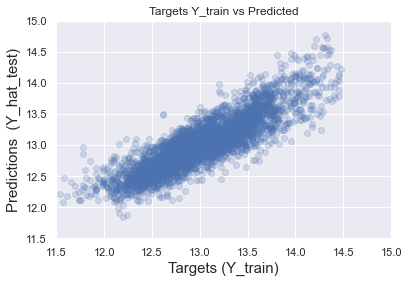

In [48]:
plt.scatter(y_test ,y_hat_test, alpha=0.2)
plt.xlabel('Targets (Y_train)', size=15)
plt.ylabel('Predictions  (Y_hat_test)', size=15)
plt.xlim(11.5,15)
plt.ylim(11.5,15)
plt.title('Targets ''Y_train'' vs Predicted')


### Actual Value Predicted Value Differences chart
The Linear Regression model's final test is to test how good the predictions hold up to the actual data. For this, i use the NumPy method to transform the variables back to their original form. Create a prediction column using the x_test predicated data. I then take y_test and target columns by transforming the data using NumPy.exp and reset the index. I finish it off by visualizing a new dataset with new columns containing predictions, target residuals, differences in percentage to show this model's efficiency.

In [49]:
predv =pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
predv['Target'] = np.exp(y_test)
y_test = y_test.reset_index(drop=True)

In [50]:
predv['Residual'] = predv['Target'] - predv['Predictions']

In [51]:
predv['Difference%'] = np.absolute(predv['Residual']/predv['Target']*100)
predv

,Predictions,Target,Residual,Difference%
0,770844.418,NaN,NaN,NaN
1,278648.700,NaN,NaN,NaN
2,508820.083,NaN,NaN,NaN
3,475345.207,NaN,NaN,NaN
4,259744.052,510000.000,250255.948,49.070
...,...,...,...,...
4057,458325.495,NaN,NaN,NaN
4058,259843.851,NaN,NaN,NaN
4059,355266.575,NaN,NaN,NaN
4060,427475.582,NaN,NaN,NaN
